<a href="https://colab.research.google.com/github/Shadoww002/PyTorch-Learning/blob/main/Chapter%202%20%E2%80%93%20Neural%20Network%20Classification/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
## make classification data
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples,
                     noise = 0.03,
                     random_state=42)

len(X) , len(y)

(1000, 1000)

In [3]:
X[:5] , y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [4]:
# Make Dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "Lable" : y})

circles.head(10)

,X1,X2,Lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


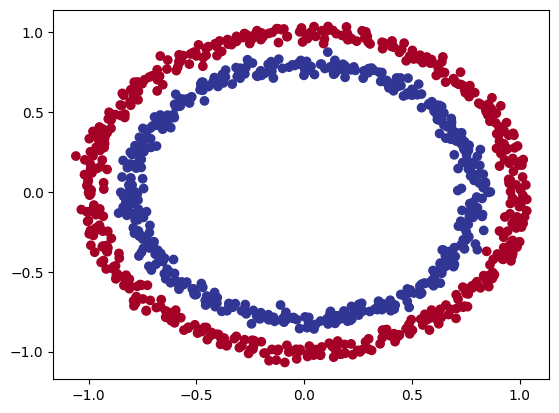

In [5]:
## Visualise The Data
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)


In [6]:
## Input And Output Shapes Of Data
X.shape , y.shape

((1000, 2), (1000,))

In [7]:
type(X) , type(y)

(numpy.ndarray, numpy.ndarray)

In [8]:
## Convert Data to Tensors
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
type(X) , type(y)

(torch.Tensor, torch.Tensor)

In [10]:
X[:5] , y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
##Split Data into training and test sets
from sklearn.model_selection import train_test_split
X_train ,  X_test , y_train , y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)

len(X_train),len(X_test) , len(y_train) , len(y_test)

(800, 200, 800, 200)

In [12]:
## Building a Model

In [13]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [15]:
X_train.shape

torch.Size([800, 2])

In [16]:
y_train[0]

tensor(1.)

In [17]:
## Creating a Model Class

class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 ,
                             out_features=5)
    self.layer_2 = nn.Linear(in_features=5 ,
                             out_features=1)

  def forward(self , x):
    return (self.layer_2(self.layer_1(x)))

model_0 = CircleModel()
model_0.to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [19]:
## Lets Recreate above Model using NN.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2 ,
              out_features=5),
    nn.Linear(in_features=5 ,
              out_features=1)
).to(device)

In [20]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6788, -0.3703],
                      [ 0.0674, -0.4368],
                      [ 0.6682,  0.1390],
                      [ 0.1300,  0.2113],
                      [-0.0883, -0.1500]], device='cuda:0')),
             ('0.bias',
              tensor([0.6971, 0.6911, 0.2028, 0.6345, 0.5068], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1985, -0.2841, -0.3376, -0.2246, -0.0091]], device='cuda:0')),
             ('1.bias', tensor([0.3498], device='cuda:0'))])

In [22]:
X_test[:10,] , y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [23]:
## Making Predictions using untrained Model
with torch.inference_mode():
  model_0.eval()
  untrained_pred = model_0(X_test.to(device))

In [24]:
untrained_pred[:10].to(device)

tensor([[ 0.2004],
        [ 0.0293],
        [ 0.3763],
        [ 0.1517],
        [-0.0563],
        [-0.1573],
        [-0.2962],
        [-0.3410],
        [ 0.3943],
        [ 0.0131]], device='cuda:0')

In [25]:
## Setting Up Loss And Optimiser Functions
loss_fn = nn.BCEWithLogitsLoss()

optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [26]:
## Calculating the Accuracy
def accuracy_fn(y_true ,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [27]:
## Understanding the First 5 outputs i.e raw logits
with torch.inference_mode():
  model_0.eval()
  y_logits = model_0(X_test.to(device))
y_logits[:5]


tensor([[ 0.2004],
        [ 0.0293],
        [ 0.3763],
        [ 0.1517],
        [-0.0563]], device='cuda:0')

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [29]:
## converting the y_logits to prediction Probabilities with sigmoid function
y_pred_prob = torch.sigmoid(y_logits.to(device))

In [30]:
y_pred_prob[:5]

tensor([[0.5499],
        [0.5073],
        [0.5930],
        [0.5378],
        [0.4859]], device='cuda:0')

In [31]:
torch.round(y_pred_prob)[:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

In [32]:
## Building a Training LOOP
## setting seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

##No of iterations
epochs = 100

##Putting Data on Device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  ## model to train mode
  model_0.train()

  #do forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_pred = y_pred ,
                    y_true = y_train)

  # zero grad the optimiser
  optimiser.zero_grad()

  #back propogation
  loss.backward()

  #gradient descent
  optimiser.step()

  ### Testing LOOP
  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    ## print The INFO
    if epoch % 50 == 0:
      print(f"Epoch : {epoch} | loss : {loss:.5f} | Train_acc : {acc:.2f}% | test_loss : {test_loss:.5f} | Test_acc : {test_acc:.2f}%")


Epoch : 0 | loss : 0.70363 | Train_acc : 51.25% | test_loss : 0.69683 | Test_acc : 49.50%
Epoch : 50 | loss : 0.69590 | Train_acc : 49.88% | test_loss : 0.69393 | Test_acc : 47.50%


In [33]:
## Using the helper Function From a repo
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

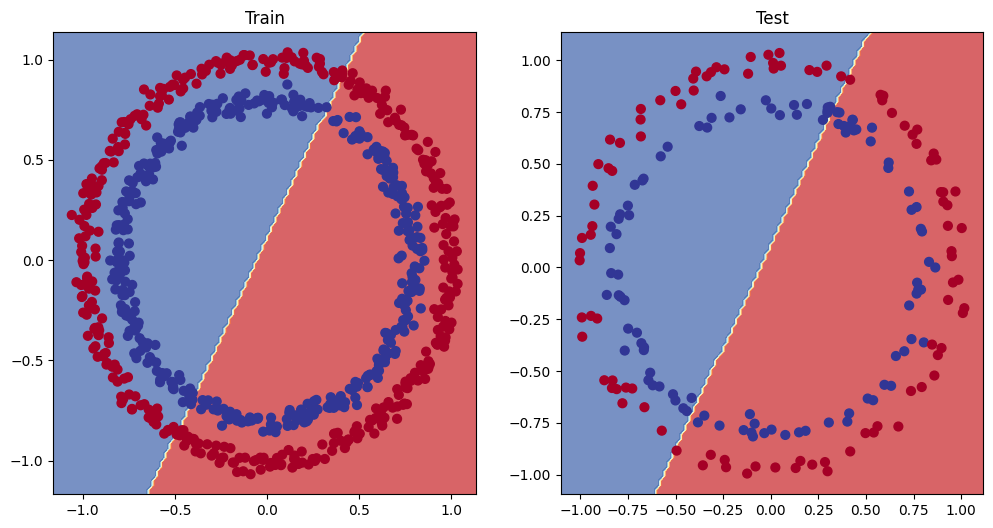

In [34]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [35]:
## Improving the Model By adding the layer and Adding the more features/hidden units
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 ,
                             out_features=64)
    self.layer_2 = nn.Linear(in_features=64,
                             out_features=128)
    self.layer_3 = nn.Linear(in_features=128 ,
                             out_features=256)
    self.layer_4 = nn.Linear(in_features=256 ,
                             out_features=128)
    self.layer_5 = nn.Linear(in_features=128 ,
                             out_features=64)
    self.layer_6 = nn.Linear(in_features=64 ,
                             out_features=1)

  def forward(self , x):
    return (self.layer_6(self.layer_5(self.layer_4(self.layer_3(self.layer_2(self.layer_1(x)))))))

model_1 = CircleModel()
model_1.to(device)
model_1

CircleModel(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=256, bias=True)
  (layer_4): Linear(in_features=256, out_features=128, bias=True)
  (layer_5): Linear(in_features=128, out_features=64, bias=True)
  (layer_6): Linear(in_features=64, out_features=1, bias=True)
)

In [36]:
## Setting Up Loss And Optimiser Functions
loss_fn = nn.BCEWithLogitsLoss()

optimiser = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [37]:
## Building a Training LOOP
## setting seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

##No of iterations
epochs = 1000

##Putting Data on Device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  ## model to train mode
  model_1.train()

  #do forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_pred = y_pred ,
                    y_true = y_train)

  # zero grad the optimiser
  optimiser.zero_grad()

  #back propogation
  loss.backward()

  #gradient descent
  optimiser.step()

  ### Testing LOOP
  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    ## print The INFO
    if epoch % 50 == 0:
      print(f"Epoch : {epoch} | loss : {loss:.5f} | Train_acc : {acc:.2f}% | test_loss : {test_loss:.5f} | Test_acc : {test_acc:.2f}%")


Epoch : 0 | loss : 0.69358 | Train_acc : 50.00% | test_loss : 0.69357 | Test_acc : 50.00%
Epoch : 50 | loss : 0.69331 | Train_acc : 50.00% | test_loss : 0.69346 | Test_acc : 50.00%
Epoch : 100 | loss : 0.69318 | Train_acc : 50.00% | test_loss : 0.69347 | Test_acc : 50.00%
Epoch : 150 | loss : 0.69312 | Train_acc : 50.00% | test_loss : 0.69352 | Test_acc : 50.00%
Epoch : 200 | loss : 0.69308 | Train_acc : 46.38% | test_loss : 0.69359 | Test_acc : 46.50%
Epoch : 250 | loss : 0.69306 | Train_acc : 48.75% | test_loss : 0.69366 | Test_acc : 47.00%
Epoch : 300 | loss : 0.69304 | Train_acc : 49.88% | test_loss : 0.69373 | Test_acc : 46.00%
Epoch : 350 | loss : 0.69303 | Train_acc : 50.38% | test_loss : 0.69380 | Test_acc : 46.50%
Epoch : 400 | loss : 0.69302 | Train_acc : 50.75% | test_loss : 0.69386 | Test_acc : 45.50%
Epoch : 450 | loss : 0.69302 | Train_acc : 51.12% | test_loss : 0.69392 | Test_acc : 46.50%
Epoch : 500 | loss : 0.69301 | Train_acc : 51.62% | test_loss : 0.69398 | Test_acc 

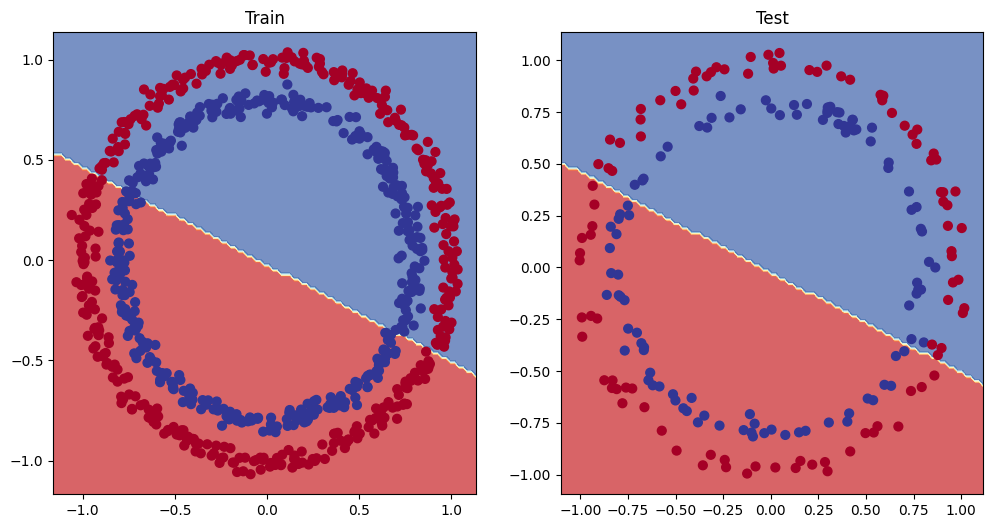

In [38]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [39]:
## Using The Above Model For the Linear Data Predictions
torch.manual_seed(42)
#creation the data
bias = 0.35
weight = 0.85

X_reg = torch.Tensor(torch.arange(0 ,1,0.0015)).unsqueeze(dim=1)
y_reg = X_reg*weight + bias

In [40]:
X_reg[:5] , y_reg[:5]

(tensor([[0.0000],
         [0.0015],
         [0.0030],
         [0.0045],
         [0.0060]]),
 tensor([[0.3500],
         [0.3513],
         [0.3525],
         [0.3538],
         [0.3551]]))

In [41]:
len(X_reg),len(y_reg)

(667, 667)

In [42]:
# Split into train and test
train_split = int(0.8 * len(X_reg))
X_train_reg, X_test_reg = X_reg[:train_split], X_reg[train_split:]
y_train_reg, y_test_reg = y_reg[:train_split], y_reg[train_split:]

In [43]:
X_train_reg.shape ,y_train_reg.shape

(torch.Size([533, 1]), torch.Size([533, 1]))

In [44]:
X_train_reg.shape , X_test_reg.shape , y_train_reg.shape , y_test_reg.shape

(torch.Size([533, 1]),
 torch.Size([134, 1]),
 torch.Size([533, 1]),
 torch.Size([134, 1]))

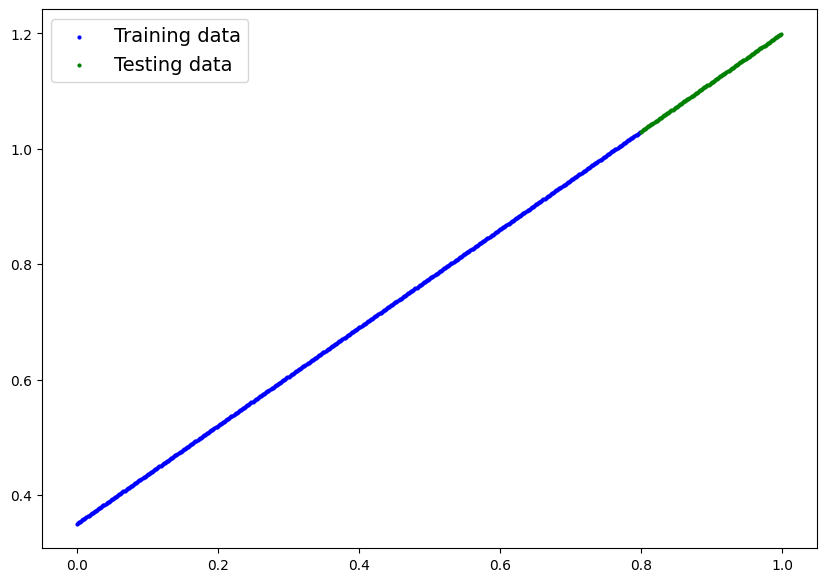

In [45]:
plot_predictions(train_data=X_train_reg,
                 train_labels = y_train_reg,
                 test_data = X_test_reg,
                 test_labels = y_test_reg)

In [46]:
## Creating Model with same architecture but diff Features
import torch
from torch import nn

model_2 = nn.Sequential(
    nn.Linear(in_features=1 ,
              out_features=64),
    nn.Linear(in_features=64,
              out_features=128),
    nn.Linear(in_features=128 ,
              out_features=256),
    nn.Linear(in_features=256 ,
              out_features=128),
    nn.Linear(in_features=128 ,
              out_features=64),
    nn.Linear(in_features=64 ,
              out_features=1)

).to(device)

model_2


Sequential(
  (0): Linear(in_features=1, out_features=64, bias=True)
  (1): Linear(in_features=64, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): Linear(in_features=64, out_features=1, bias=True)
)

In [55]:
loss_fn = nn.L1Loss()
optm = torch.optim.SGD(params=model_2.parameters(),
                       lr = 0.01)

In [56]:
# After train_test_split
X_train_reg = X_train_reg.to(device)
X_test_reg = X_test_reg.to(device)
y_train_reg = y_train_reg.to(device)
y_test_reg = y_test_reg.to(device)

In [57]:
X_train_reg.shape

torch.Size([533, 1])

In [58]:
## Train and Test LOOP
torch.cuda.manual_seed(42)
torch.manual_seed(42)

epochs = 300

for epoch in range(epochs):
  model_2.train()

  y_pred_reg = model_2(X_train_reg)

  loss = loss_fn(y_pred_reg , y_train_reg)

  optm.zero_grad()

  loss.backward()

  optm.step()

  ## Test LOOP
  model_2.eval()
  with torch.inference_mode():
    test_pred_reg = model_2(X_test_reg)
    test_loss = loss_fn(test_pred_reg , y_test_reg)

  if epoch % 10 == 0:
   print(f"Epoch : {epoch} | Loss : {loss:.5f} | Test Loss : {test_loss:.5f}")

Epoch : 0 | Loss : 0.01415 | Test Loss : 0.06855
Epoch : 10 | Loss : 0.01770 | Test Loss : 0.06100
Epoch : 20 | Loss : 0.01413 | Test Loss : 0.06751
Epoch : 30 | Loss : 0.01062 | Test Loss : 0.07391
Epoch : 40 | Loss : 0.00718 | Test Loss : 0.08019
Epoch : 50 | Loss : 0.01364 | Test Loss : 0.06653
Epoch : 60 | Loss : 0.01022 | Test Loss : 0.07281
Epoch : 70 | Loss : 0.00685 | Test Loss : 0.07842
Epoch : 80 | Loss : 0.01092 | Test Loss : 0.07010
Epoch : 90 | Loss : 0.00760 | Test Loss : 0.07621
Epoch : 100 | Loss : 0.01137 | Test Loss : 0.06796
Epoch : 110 | Loss : 0.00809 | Test Loss : 0.07401
Epoch : 120 | Loss : 0.01157 | Test Loss : 0.06633
Epoch : 130 | Loss : 0.00833 | Test Loss : 0.07232
Epoch : 140 | Loss : 0.01527 | Test Loss : 0.05766
Epoch : 150 | Loss : 0.01203 | Test Loss : 0.06367
Epoch : 160 | Loss : 0.00885 | Test Loss : 0.06958
Epoch : 170 | Loss : 0.00576 | Test Loss : 0.06002
Epoch : 180 | Loss : 0.01010 | Test Loss : 0.06590
Epoch : 190 | Loss : 0.00700 | Test Loss :

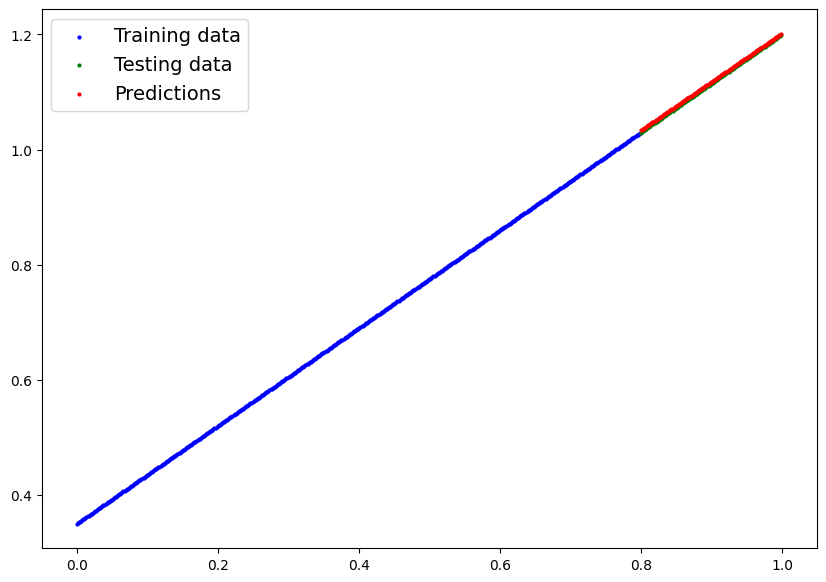

In [59]:
# Turn model into evaluation mode
model_2.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_pred_test_reg = model_2(X_test_reg)

# Plot the predictions
plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_pred_test_reg.cpu());

In [118]:
## Getting Started with the Non_linearity

In [119]:
# Creating The Data of Circles
from sklearn.datasets import make_circles

n_sample = 1000
X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)
X[:5],len(X) ,y[:5], len(y)

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 1000,
 array([1, 1, 1, 1, 0]),
 1000)

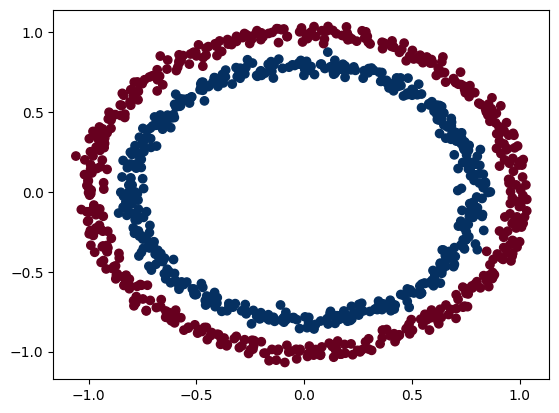

In [120]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [121]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.2)

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(800, 200, 800, 200)

In [122]:
## Building The Model
from torch import nn

class CircleModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 , out_features=32)
    self.layer_2 = nn.Linear(in_features=32 , out_features=32)
    self.layer_3 = nn.Linear(in_features=32 , out_features=1)
    self.relu = nn.ReLU()

  def forward(self , x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelv2().to(device)
model_3

CircleModelv2(
  (layer_1): Linear(in_features=2, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [123]:
loss_fn = nn.BCEWithLogitsLoss()
optm_fn = torch.optim.SGD(params=model_3.parameters(),
                           lr = 0.1
                          )

In [124]:
##Training And Testing
torch.manual_seed(42)

X_train , X_test = X_train.to(device) , X_test.to(device)
y_train , y_test = y_train.to(device) , y_test.to(device)

epochs = 800

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred= y_pred)

  optm_fn.zero_grad()
  loss.backward()
  optm_fn.step()

  ##test

  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_logits_loss = loss_fn(y_test,test_logits)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred = test_pred)


    if epoch % 50 == 0 :
      print(f"Epoch : {epoch} | loss : {loss:.5f} | acc : {acc:.2f}% | test Loss : {test_loss:.5f} | test Acc : {test_acc:.2f}% ")



Epoch : 0 | loss : 0.69489 | acc : 46.25% | test Loss : 0.00284 | test Acc : 49.50% 
Epoch : 50 | loss : 0.69203 | acc : 58.13% | test Loss : 0.00284 | test Acc : 58.50% 
Epoch : 100 | loss : 0.68973 | acc : 62.25% | test Loss : 0.00284 | test Acc : 58.50% 
Epoch : 150 | loss : 0.68730 | acc : 59.88% | test Loss : 0.00284 | test Acc : 56.00% 
Epoch : 200 | loss : 0.68436 | acc : 60.62% | test Loss : 0.00284 | test Acc : 59.00% 
Epoch : 250 | loss : 0.68066 | acc : 65.62% | test Loss : 0.00284 | test Acc : 61.50% 
Epoch : 300 | loss : 0.67575 | acc : 71.75% | test Loss : 0.00284 | test Acc : 70.50% 
Epoch : 350 | loss : 0.66907 | acc : 81.88% | test Loss : 0.00284 | test Acc : 82.00% 
Epoch : 400 | loss : 0.65956 | acc : 89.88% | test Loss : 0.00284 | test Acc : 90.50% 
Epoch : 450 | loss : 0.64554 | acc : 95.00% | test Loss : 0.00284 | test Acc : 94.00% 
Epoch : 500 | loss : 0.62409 | acc : 97.50% | test Loss : 0.00284 | test Acc : 98.00% 
Epoch : 550 | loss : 0.59414 | acc : 99.38% | 

In [126]:
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_pred[:5]

tensor([1., 0., 0., 1., 0.], device='cuda:0')

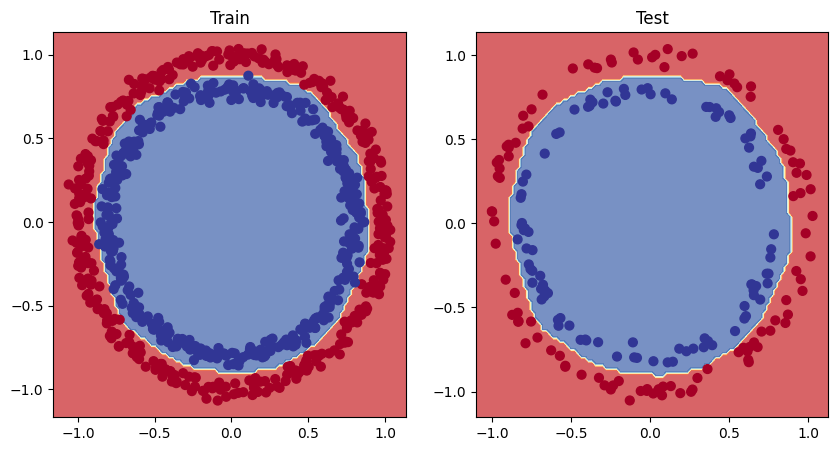

In [136]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,
                       X_train ,
                       y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,
                       X_test,
                       y_test)
